In [1]:
cd ../system/

/Users/dorislee/Desktop/Research/viz-sum/system


In [5]:
from lattice import Lattice
from node import vizNode
import networkx as nx
from vizObj import vizObj
from collections import OrderedDict
import json

In [6]:
# set up the tree example
G = Lattice()
v1 = vizObj(x=["Clinton", "Trump", "Others"],y="% of vote",filters=["All"],\
            agg_func="SUM",tablename="election")
v1.setData([48, 46, 6])
root = vizNode(viz=v1, parents=None)

v2 = vizObj(x=["Clinton", "Trump", "Others"],y="% of vote",filters=["Race = White"],\
            agg_func="SUM",tablename="election")
v2.setData([31, 62, 7])
W = vizNode(viz=v2,parents=[root])

v3 = vizObj(x=["Clinton", "Trump", "Others"],y="% of vote",filters=["Gender = F"],\
            agg_func="SUM",tablename="election")
v3.setData([21, 70, 9])
F = vizNode(viz=v3,parents=[root])
# set up the tree example
for nodes in G.getNodes():
    for child in nodes.get_child():
        G.addEdge(nodes, child)
G.addMultiNodes([root,W,F])
root.set_children([W,F])   

In [7]:
nodeDic = G.generateNodeDic()
ret = G.generateJson(root, nodeDic)
ret2 = G.generateNodeDicJsonFile()

In [17]:
nodeDic

{1: [{'xAxis': 'Clinton', 'yAxis': 48},
  {'xAxis': 'Trump', 'yAxis': 46},
  {'xAxis': 'Others', 'yAxis': 6},
  {'childrenIndex': [2, 3], 'filter': 'All', 'yName': '% of vote'}],
 2: [{'xAxis': 'Clinton', 'yAxis': 31},
  {'xAxis': 'Trump', 'yAxis': 62},
  {'xAxis': 'Others', 'yAxis': 7},
  {'childrenIndex': [], 'filter': 'Race = White', 'yName': '% of vote'}],
 3: [{'xAxis': 'Clinton', 'yAxis': 21},
  {'xAxis': 'Trump', 'yAxis': 70},
  {'xAxis': 'Others', 'yAxis': 9},
  {'childrenIndex': [], 'filter': 'Gender = F', 'yName': '% of vote'}]}

In [8]:
G.graph

In [9]:
import networkx as nx

In [11]:
nx.write_edgelist(G.graph,"test.edgelist")

In [12]:
cat test.edgelist

<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])> <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Race = White'], data: [31, 62, 7])> {}
<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])> <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Gender = F'], data: [21, 70, 9])> {}


In [14]:
G.graph.edges()

[(<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])>,
  <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Race = White'], data: [31, 62, 7])>),
 (<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])>,
  <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Gender = F'], data: [21, 70, 9])>)]

In [15]:
G.graph.nodes()

[<vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Race = White'], data: [31, 62, 7])>,
 <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['All'], data: [48, 46, 6])>,
 <vizNode (X: ['Clinton', 'Trump', 'Others'], Y: % of vote, filters: ['Gender = F'], data: [21, 70, 9])>]

In [16]:
G.graph.node_dict_factory?

In [ ]:
[{id:1, label: ----},{id:1, label: ----},{id:1, label: ----}...]
[1 to 2, 2to3 ]

-----------------------------------------------------------------------------

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import json

In [53]:
j = json.loads('{"one" : "1", "two" : "2", "three" : "3"}')

In [68]:
nodeDicStr="{\"1\": [{ \"xAxis\": \"0\", \"yAxis\":46.0},{ \"xAxis\": \"1\", \"yAxis\":64.0},{\"childrenIndex\":[1, 2, 3, 4, 5], \"filter\":\"#\",\"yName\":\"COUNT(id)\"}],\"2\": [{ \"xAxis\": \"0\", \"yAxis\":83.31374853113984},{ \"xAxis\": \"1\", \"yAxis\":16.686251468860164},{\"childrenIndex\":[6, 7, 8], \"filter\":\"#sexcode$0#\",\"yName\":\"COUNT(id)\"}],\"3\": [{ \"xAxis\": \"0\", \"yAxis\":67.0391061452514},{ \"xAxis\": \"1\", \"yAxis\":32.960893854748605},{\"childrenIndex\":[], \"filter\":\"#sexcode$0#pc_class$1#\",\"yName\":\"COUNT(id)\"}]}"

In [69]:
nodeDic=json.loads(nodeDicStr)

In [74]:
nodeDic["1"]

[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

In [118]:
def bar_chart(yVals,xAttrs,xtitle="",ytitle="",title="", N=1,width=0.1):
    ind = np.arange(N)  # the x locations for the groups

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, yVals[0], width, color='r',  ecolor= "black")
    rects2 = ax.bar(ind + width, yVals[1], width, color='b', ecolor= "black")

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ytitle,fontsize=14)
    ax.set_title(title,fontsize=16)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(xtitle,fontsize=14)

    ax.legend((rects1[0], rects2[0]), xAttrs)
    ax.set_ylim((0,100))

    autolabel(rects1, ax)
    autolabel(rects2, ax)

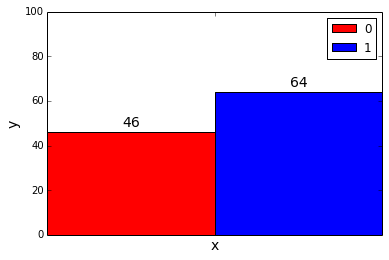

In [121]:
bar_chart((46,64),("0","1"),"x","y")

In [122]:
[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

In [123]:
filterName

u'sexcode=0;'

In [124]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom',fontsize=14)

In [125]:
import re

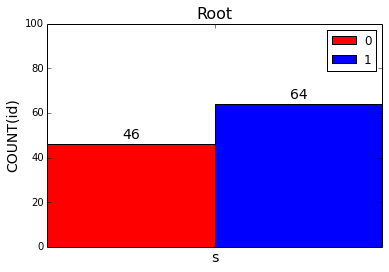

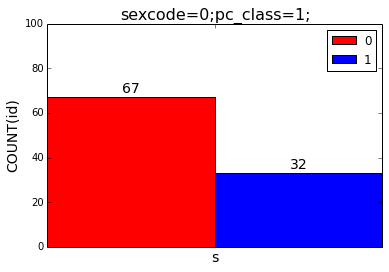

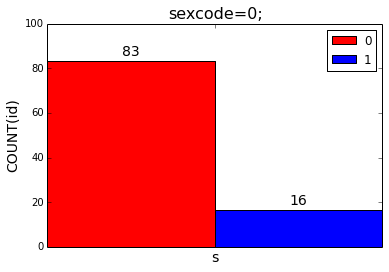

In [126]:
for node in nodeDic.values():
    xAttrs = []
    yVals =[]
    filterName=""
    for i,bar in enumerate(node): 
        if i<2:
            xAttrs.append(bar["xAxis"])
            yVals.append(bar["yAxis"])
        if i==2:
            filterName=bar['filter']
            if filterName=="#":
                filterName="Root"
            else:
                filterName=filterName.replace("0#","0;").replace("1#","1;").replace("$","=").replace("#","")
    bar_chart(yVals,xAttrs,"survived",'COUNT(id)',filterName)

[{u'xAxis': u'0', u'yAxis': 46.0},
 {u'xAxis': u'1', u'yAxis': 64.0},
 {u'childrenIndex': [1, 2, 3, 4, 5], u'filter': u'#', u'yName': u'COUNT(id)'}]

In [88]:
bar["xAxis"]

u'0'

In [85]:
for i in node:
    print i

{u'xAxis': u'0', u'yAxis': 83.31374853113984}
{u'xAxis': u'1', u'yAxis': 16.686251468860164}
{u'filter': u'#sexcode$0#', u'childrenIndex': [6, 7, 8], u'yName': u'COUNT(id)'}


In [ ]:
node[]